In [10]:
import numpy as np, seaborn as sns, pandas as pd
import matplotlib.pyplot as plt

In [105]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

id  clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  \
0   0       25.0      0.50     0.25     0.75   0.50              69.7   
1   1       25.0      0.50     0.25     0.50   0.50              69.7   
2   2       12.5      0.25     0.25     0.63   0.63              86.0   
3   3       12.5      0.25     0.25     0.63   0.50              77.4   
4   4       25.0      0.50     0.25     0.63   0.63              77.4   

   MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  \
0              42.1                  58.2              50.2              24.3   
1              42.1                  58.2              50.2              24.3   
2              52.0                  71.9              62.0              30.0   
3              46.8                  64.7              55.8              27.0   
4              46.8                  64.7              55.8              27.0   

   AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  \
0                  41.2         24.0                0.39  0.425011   0.417545   
1                  41.2         24.0                0.39  0.444908   0.422051   
2                  50.8         24.0                0.39  0.552927   0.470853   
3                  45.8         24.0                0.39  0.565976   0.478137   
4                  45.8         24.0                0.39  0.579677   0.494165   

       seeds       yield  
0  32.460887  4476.81146  
1  33.858317  5548.12201  
2  38.341781  6869.77760  
3  39.467561  6880.77590  
4  40.484512  7479.93417

In [4]:
data.describe().T

count         mean          std          min  \
id                    15289.0  7644.000000  4413.698468     0.000000   
clonesize             15289.0    19.704690     6.595211    10.000000   
honeybee              15289.0     0.389314     0.361643     0.000000   
bumbles               15289.0     0.286768     0.059917     0.000000   
andrena               15289.0     0.492675     0.148115     0.000000   
osmia                 15289.0     0.592355     0.139489     0.000000   
MaxOfUpperTRange      15289.0    82.169887     9.146703    69.700000   
MinOfUpperTRange      15289.0    49.673281     5.546405    39.000000   
AverageOfUpperTRange  15289.0    68.656256     7.641807    58.200000   
MaxOfLowerTRange      15289.0    59.229538     6.610640    50.200000   
MinOfLowerTRange      15289.0    28.660553     3.195367    24.300000   
AverageOfLowerTRange  15289.0    48.568500     5.390545    41.200000   
RainingDays           15289.0    18.660865    11.657582     1.000000   
AverageRainingDays    15289.0     0.324176     0.163905     0.060000   
fruitset              15289.0     0.502741     0.074390     0.192732   
fruitmass             15289.0     0.446553     0.037035     0.311921   
seeds                 15289.0    36.164950     4.031087    22.079199   
yield                 15289.0  6025.193999  1337.056850  1945.530610   

                              25%          50%           75%           max  
id                    3822.000000  7644.000000  11466.000000  15288.000000  
clonesize               12.500000    25.000000     25.000000     40.000000  
honeybee                 0.250000     0.500000      0.500000     18.430000  
bumbles                  0.250000     0.250000      0.380000      0.585000  
andrena                  0.380000     0.500000      0.630000      0.750000  
osmia                    0.500000     0.630000      0.750000      0.750000  
MaxOfUpperTRange        77.400000    86.000000     86.000000     94.600000  
MinOfUpperTRange        46.800000    52.000000     52.000000     57.200000  
AverageOfUpperTRange    64.700000    71.900000     71.900000     79.000000  
MaxOfLowerTRange        55.800000    62.000000     62.000000     68.200000  
MinOfLowerTRange        27.000000    30.000000     30.000000     33.000000  
AverageOfLowerTRange    45.800000    50.800000     50.800000     55.900000  
RainingDays             16.000000    16.000000     24.000000     34.000000  
AverageRainingDays       0.260000     0.260000      0.390000      0.560000  
fruitset                 0.458246     0.506600      0.560445      0.652144  
fruitmass                0.419216     0.446570      0.474134      0.535660  
seeds                   33.232449    36.040675     39.158238     46.585105  
yield                 5128.163510  6117.475900   7019.694380   8969.401840

In [5]:
data.dtypes

id                        int64
clonesize               float64
honeybee                float64
bumbles                 float64
andrena                 float64
osmia                   float64
MaxOfUpperTRange        float64
MinOfUpperTRange        float64
AverageOfUpperTRange    float64
MaxOfLowerTRange        float64
MinOfLowerTRange        float64
AverageOfLowerTRange    float64
RainingDays             float64
AverageRainingDays      float64
fruitset                float64
fruitmass               float64
seeds                   float64
yield                   float64
dtype: object

<AxesSubplot: >

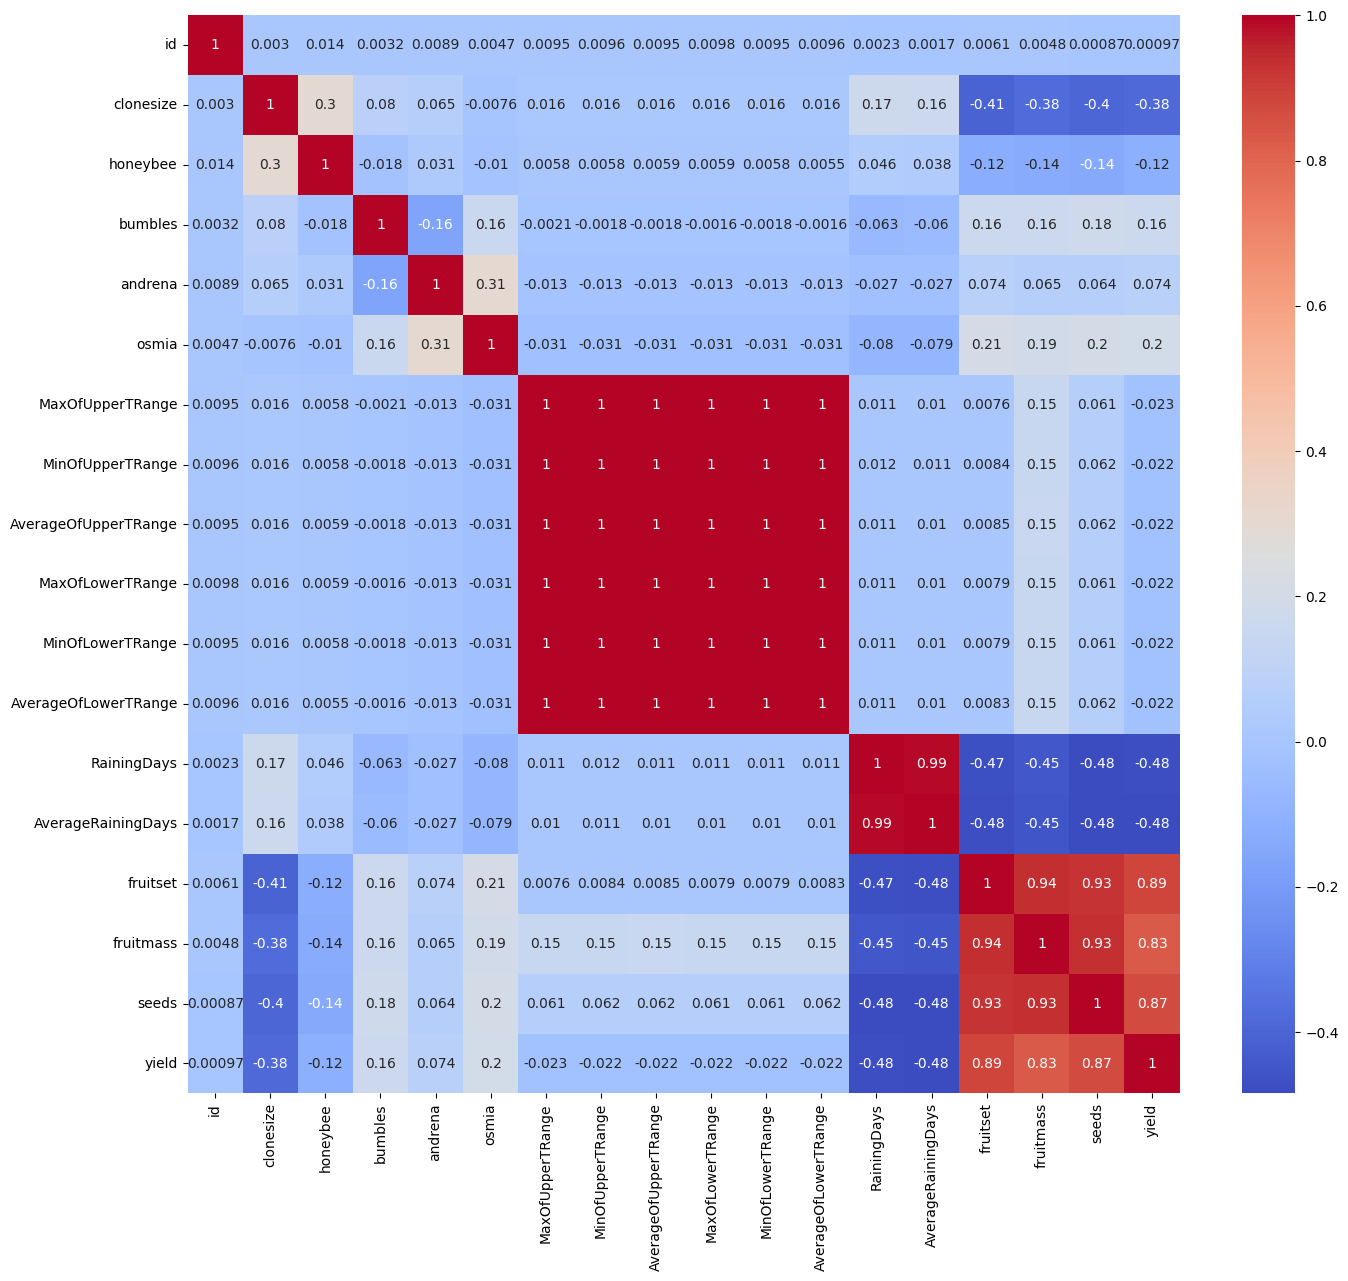

In [14]:
plt.figure(figsize=(16,14))
sns.heatmap(data=data.corr(),cmap=plt.cm.coolwarm,annot=True)

In [24]:
def MultiCorrelation(data,threshold):
    count = len(data.corr().columns)
    corr_df = data.corr()
    big_corr_list = dict()
    for i in range(count):
        for j in range(count):
            if (corr_df.iloc[i,j] > threshold and i is not j) :
                big_corr_list["{}-{}".format(corr_df.columns[i],corr_df.columns[j])]=corr_df.iloc[i,j]
                
    return big_corr_list

In [43]:
MultiCorrelation(data,0.9)

{}

In [47]:
df = data.drop('id',axis=1)

In [48]:
df

clonesize  honeybee  bumbles  andrena  osmia  AverageOfLowerTRange  \
0           25.0      0.50     0.25     0.75   0.50                  41.2   
1           25.0      0.50     0.25     0.50   0.50                  41.2   
2           12.5      0.25     0.25     0.63   0.63                  50.8   
3           12.5      0.25     0.25     0.63   0.50                  45.8   
4           25.0      0.50     0.25     0.63   0.63                  45.8   
...          ...       ...      ...      ...    ...                   ...   
15284       12.5      0.25     0.25     0.38   0.50                  45.8   
15285       12.5      0.25     0.25     0.25   0.50                  50.8   
15286       25.0      0.50     0.25     0.38   0.75                  45.8   
15287       25.0      0.50     0.25     0.63   0.63                  41.2   
15288       25.0      0.50     0.25     0.63   0.50                  45.8   

       RainingDays      seeds       yield  
0             24.0  32.460887  4476.81146  
1             24.0  33.858317  5548.12201  
2             24.0  38.341781  6869.77760  
3             24.0  39.467561  6880.77590  
4             24.0  40.484512  7479.93417  
...            ...        ...         ...  
15284         16.0  40.546480  7667.83619  
15285         34.0  29.467434  3680.56025  
15286         34.0  32.299059  4696.44394  
15287         24.0  36.674243  6772.93347  
15288         16.0  35.094733  5867.99722  

[15289 rows x 9 columns]

In [60]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = pd.DataFrame(mutual_info_regression(df.drop(['yield'],axis=1),df['yield']))

In [61]:
mutual_info.index = df.drop(['yield'],axis=1).columns

In [62]:
mutual_info.sort_values(0,ascending=False)

0
seeds                 1.155593
RainingDays           0.165096
clonesize             0.097245
honeybee              0.068814
osmia                 0.030947
andrena               0.030206
bumbles               0.021304
AverageOfLowerTRange  0.012132

In [63]:
X =  df.drop(['yield'],axis=1)
y =df['yield']

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [68]:
from sklearn.linear_model import Lasso,LinearRegression
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [69]:
models = dict(
    lasso_model = Lasso(),
    lr_model = LinearRegression(),
    rf_model = RandomForestRegressor(),
    cb_model = CatBoostRegressor(),
    lgbm_model = LGBMRegressor()
)

In [70]:
#fitting
for model in models.values():
    model.fit(x_train,y_train)

Learning rate set to 0.059544
0:	learn: 1277.1271196	total: 61.4ms	remaining: 1m 1s
1:	learn: 1223.9291855	total: 63.8ms	remaining: 31.8s
2:	learn: 1175.9189559	total: 66ms	remaining: 21.9s
3:	learn: 1131.0845787	total: 68.1ms	remaining: 17s
4:	learn: 1088.3876995	total: 70.1ms	remaining: 13.9s
5:	learn: 1049.1775653	total: 72.3ms	remaining: 12s
6:	learn: 1013.2899032	total: 74.5ms	remaining: 10.6s
7:	learn: 980.2948648	total: 76.4ms	remaining: 9.48s
8:	learn: 950.3189630	total: 78.2ms	remaining: 8.61s
9:	learn: 921.5575164	total: 80ms	remaining: 7.92s
10:	learn: 895.1449762	total: 81.8ms	remaining: 7.35s
11:	learn: 871.1977239	total: 83.4ms	remaining: 6.87s
12:	learn: 848.4407387	total: 85.2ms	remaining: 6.46s
13:	learn: 827.8951559	total: 86.8ms	remaining: 6.11s
14:	learn: 809.1717312	total: 88.3ms	remaining: 5.8s
15:	learn: 792.5312987	total: 89.9ms	remaining: 5.53s
16:	learn: 776.7749330	total: 91.4ms	remaining: 5.28s
17:	learn: 763.0169766	total: 92.9ms	remaining: 5.07s
18:	learn:

194:	learn: 599.3238676	total: 380ms	remaining: 1.57s
195:	learn: 599.2086527	total: 382ms	remaining: 1.57s
196:	learn: 599.0132557	total: 384ms	remaining: 1.56s
197:	learn: 598.8807854	total: 386ms	remaining: 1.56s
198:	learn: 598.8735502	total: 387ms	remaining: 1.56s
199:	learn: 598.6715437	total: 389ms	remaining: 1.56s
200:	learn: 598.5741592	total: 391ms	remaining: 1.55s
201:	learn: 598.4848193	total: 393ms	remaining: 1.55s
202:	learn: 598.4211601	total: 395ms	remaining: 1.55s
203:	learn: 598.3313342	total: 397ms	remaining: 1.55s
204:	learn: 598.2138528	total: 399ms	remaining: 1.55s
205:	learn: 598.0858547	total: 401ms	remaining: 1.54s
206:	learn: 598.0789307	total: 402ms	remaining: 1.54s
207:	learn: 597.9953389	total: 404ms	remaining: 1.54s
208:	learn: 597.8486413	total: 406ms	remaining: 1.54s
209:	learn: 597.8396008	total: 408ms	remaining: 1.53s
210:	learn: 597.7639692	total: 410ms	remaining: 1.53s
211:	learn: 597.7426175	total: 411ms	remaining: 1.53s
212:	learn: 597.6333663	tota

418:	learn: 579.6116720	total: 760ms	remaining: 1.05s
419:	learn: 579.4711845	total: 762ms	remaining: 1.05s
420:	learn: 579.4324640	total: 764ms	remaining: 1.05s
421:	learn: 579.3780863	total: 766ms	remaining: 1.05s
422:	learn: 579.2131120	total: 768ms	remaining: 1.05s
423:	learn: 579.1546972	total: 769ms	remaining: 1.04s
424:	learn: 579.1467191	total: 771ms	remaining: 1.04s
425:	learn: 579.0505538	total: 773ms	remaining: 1.04s
426:	learn: 578.9752240	total: 775ms	remaining: 1.04s
427:	learn: 578.8810371	total: 777ms	remaining: 1.04s
428:	learn: 578.7577098	total: 779ms	remaining: 1.04s
429:	learn: 578.7222184	total: 780ms	remaining: 1.03s
430:	learn: 578.6393452	total: 782ms	remaining: 1.03s
431:	learn: 578.5144695	total: 784ms	remaining: 1.03s
432:	learn: 578.3809595	total: 786ms	remaining: 1.03s
433:	learn: 578.3226429	total: 788ms	remaining: 1.03s
434:	learn: 578.3127715	total: 790ms	remaining: 1.02s
435:	learn: 578.3038581	total: 792ms	remaining: 1.02s
436:	learn: 578.2644807	tota

632:	learn: 565.6842853	total: 1.14s	remaining: 661ms
633:	learn: 565.6601492	total: 1.14s	remaining: 660ms
634:	learn: 565.6274875	total: 1.14s	remaining: 658ms
635:	learn: 565.5948102	total: 1.15s	remaining: 656ms
636:	learn: 565.5224857	total: 1.15s	remaining: 654ms
637:	learn: 565.4365756	total: 1.15s	remaining: 653ms
638:	learn: 565.3922374	total: 1.15s	remaining: 651ms
639:	learn: 565.2690875	total: 1.15s	remaining: 649ms
640:	learn: 565.1991475	total: 1.16s	remaining: 647ms
641:	learn: 565.1007539	total: 1.16s	remaining: 646ms
642:	learn: 565.0905331	total: 1.16s	remaining: 644ms
643:	learn: 565.0323261	total: 1.16s	remaining: 642ms
644:	learn: 564.9846314	total: 1.16s	remaining: 640ms
645:	learn: 564.9492840	total: 1.17s	remaining: 639ms
646:	learn: 564.9483211	total: 1.17s	remaining: 637ms
647:	learn: 564.9112813	total: 1.17s	remaining: 635ms
648:	learn: 564.8744544	total: 1.17s	remaining: 634ms
649:	learn: 564.7514234	total: 1.17s	remaining: 632ms
650:	learn: 564.6554488	tota

858:	learn: 553.9598270	total: 1.52s	remaining: 250ms
859:	learn: 553.8811858	total: 1.52s	remaining: 248ms
860:	learn: 553.7940341	total: 1.53s	remaining: 247ms
861:	learn: 553.7914181	total: 1.53s	remaining: 245ms
862:	learn: 553.7911438	total: 1.53s	remaining: 243ms
863:	learn: 553.6801524	total: 1.53s	remaining: 241ms
864:	learn: 553.6143154	total: 1.53s	remaining: 240ms
865:	learn: 553.6041077	total: 1.54s	remaining: 238ms
866:	learn: 553.5325990	total: 1.54s	remaining: 236ms
867:	learn: 553.4939104	total: 1.54s	remaining: 234ms
868:	learn: 553.4443810	total: 1.54s	remaining: 233ms
869:	learn: 553.3252970	total: 1.54s	remaining: 231ms
870:	learn: 553.2142570	total: 1.55s	remaining: 230ms
871:	learn: 553.1268487	total: 1.55s	remaining: 228ms
872:	learn: 553.0734592	total: 1.55s	remaining: 226ms
873:	learn: 553.0084715	total: 1.56s	remaining: 225ms
874:	learn: 552.9558177	total: 1.56s	remaining: 223ms
875:	learn: 552.9241888	total: 1.56s	remaining: 221ms
876:	learn: 552.8537045	tota

In [71]:
for k,v in models.items():
    print("{} has score =>{}".format(k,v.score(x_test,y_test)))

lasso_model has score =>0.7607622032991692
lr_model has score =>0.7609619437831967
rf_model has score =>0.7464522385639076
cb_model has score =>0.7737053925801728
lgbm_model has score =>0.7774375347076835


In [72]:
#lasso tuning 
from sklearn.model_selection import GridSearchCV

In [91]:
lasso_param = {"alpha":[0.01,0.05,0.08,0.1,0.2,0.24,0.26,0.3,0.4,0.5,0.7,0.9,1,1.1,1.2,1.3,1.5,2,3,5,10]}

In [92]:
grid = GridSearchCV(models["lasso_model"],lasso_param,cv=10,n_jobs=-1,verbose=1).fit(x_train,y_train)

Fitting 10 folds for each of 21 candidates, totalling 210 fits


In [93]:
grid.best_params_

{'alpha': 0.24}

In [100]:
lasso_tuned_model = Lasso(alpha=1).fit(x_train,y_train)

In [101]:
lasso_tuned_model.score(x_test,y_test)

0.7607622032991692

In [104]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(models["cb_model"].predict(x_test),y_test))

639.1320310901253

In [106]:
X =  data.drop(['yield'],axis=1)
y =data['yield']

In [107]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [108]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [136]:
models = dict(
    lasso_model = Lasso(0.2),
    lr_model = LinearRegression(),
    rf_model = RandomForestRegressor(),
    cb_model = CatBoostRegressor(),
    lgbm_model = LGBMRegressor(learning_rate=0.1)
)

In [137]:
#fitting
for model in models.values():
    model.fit(x_train,y_train)

Learning rate set to 0.059544
0:	learn: 1276.0917381	total: 2.35ms	remaining: 2.35s
1:	learn: 1220.8689918	total: 4.46ms	remaining: 2.23s
2:	learn: 1169.8672183	total: 6.54ms	remaining: 2.17s
3:	learn: 1122.8106194	total: 8.54ms	remaining: 2.13s
4:	learn: 1078.1731523	total: 10.6ms	remaining: 2.12s
5:	learn: 1035.6128131	total: 12.7ms	remaining: 2.11s
6:	learn: 997.5895802	total: 14.8ms	remaining: 2.11s
7:	learn: 962.1871779	total: 16.9ms	remaining: 2.1s
8:	learn: 930.6084862	total: 18.9ms	remaining: 2.08s
9:	learn: 900.1601890	total: 21ms	remaining: 2.08s
10:	learn: 871.2036884	total: 23ms	remaining: 2.07s
11:	learn: 845.2595893	total: 25ms	remaining: 2.06s
12:	learn: 822.1762155	total: 27.1ms	remaining: 2.06s
13:	learn: 799.2675150	total: 29.2ms	remaining: 2.05s
14:	learn: 779.0241121	total: 31.1ms	remaining: 2.04s
15:	learn: 759.7742797	total: 33.2ms	remaining: 2.04s
16:	learn: 741.6975928	total: 35.2ms	remaining: 2.03s
17:	learn: 725.6093428	total: 37.3ms	remaining: 2.03s
18:	learn

206:	learn: 535.1692346	total: 383ms	remaining: 1.47s
207:	learn: 534.8331370	total: 386ms	remaining: 1.47s
208:	learn: 534.7847991	total: 387ms	remaining: 1.47s
209:	learn: 534.6033942	total: 390ms	remaining: 1.47s
210:	learn: 534.4327418	total: 392ms	remaining: 1.46s
211:	learn: 534.4218625	total: 393ms	remaining: 1.46s
212:	learn: 534.4039292	total: 395ms	remaining: 1.46s
213:	learn: 534.2245744	total: 397ms	remaining: 1.46s
214:	learn: 534.0191044	total: 400ms	remaining: 1.46s
215:	learn: 533.8133698	total: 402ms	remaining: 1.46s
216:	learn: 533.5766634	total: 404ms	remaining: 1.46s
217:	learn: 533.4109632	total: 406ms	remaining: 1.46s
218:	learn: 533.2729906	total: 408ms	remaining: 1.46s
219:	learn: 533.0244935	total: 411ms	remaining: 1.46s
220:	learn: 532.8343228	total: 413ms	remaining: 1.45s
221:	learn: 532.5360522	total: 415ms	remaining: 1.45s
222:	learn: 532.4112622	total: 417ms	remaining: 1.45s
223:	learn: 532.3204793	total: 419ms	remaining: 1.45s
224:	learn: 532.2252535	tota

410:	learn: 508.2839088	total: 767ms	remaining: 1.1s
411:	learn: 508.1691820	total: 770ms	remaining: 1.1s
412:	learn: 508.1237041	total: 772ms	remaining: 1.1s
413:	learn: 507.9869254	total: 774ms	remaining: 1.09s
414:	learn: 507.8824999	total: 776ms	remaining: 1.09s
415:	learn: 507.7165242	total: 778ms	remaining: 1.09s
416:	learn: 507.7023404	total: 780ms	remaining: 1.09s
417:	learn: 507.5964534	total: 782ms	remaining: 1.09s
418:	learn: 507.5072947	total: 784ms	remaining: 1.09s
419:	learn: 507.4048294	total: 786ms	remaining: 1.08s
420:	learn: 507.2993268	total: 788ms	remaining: 1.08s
421:	learn: 507.1762117	total: 790ms	remaining: 1.08s
422:	learn: 507.0655616	total: 792ms	remaining: 1.08s
423:	learn: 506.9186474	total: 794ms	remaining: 1.08s
424:	learn: 506.8431258	total: 796ms	remaining: 1.08s
425:	learn: 506.7052633	total: 798ms	remaining: 1.07s
426:	learn: 506.6210571	total: 800ms	remaining: 1.07s
427:	learn: 506.4079908	total: 802ms	remaining: 1.07s
428:	learn: 506.2429442	total: 

613:	learn: 486.3715104	total: 1.15s	remaining: 725ms
614:	learn: 486.3012405	total: 1.16s	remaining: 723ms
615:	learn: 486.1399674	total: 1.16s	remaining: 721ms
616:	learn: 486.0035241	total: 1.16s	remaining: 720ms
617:	learn: 485.8762530	total: 1.16s	remaining: 718ms
618:	learn: 485.7853670	total: 1.16s	remaining: 716ms
619:	learn: 485.7350716	total: 1.17s	remaining: 714ms
620:	learn: 485.6902576	total: 1.17s	remaining: 713ms
621:	learn: 485.5174299	total: 1.17s	remaining: 711ms
622:	learn: 485.4091686	total: 1.17s	remaining: 709ms
623:	learn: 485.2624759	total: 1.17s	remaining: 708ms
624:	learn: 485.2174158	total: 1.18s	remaining: 706ms
625:	learn: 485.1190259	total: 1.18s	remaining: 704ms
626:	learn: 484.9841065	total: 1.18s	remaining: 702ms
627:	learn: 484.9446107	total: 1.18s	remaining: 701ms
628:	learn: 484.8378504	total: 1.18s	remaining: 699ms
629:	learn: 484.7206988	total: 1.19s	remaining: 697ms
630:	learn: 484.5543745	total: 1.19s	remaining: 696ms
631:	learn: 484.4553092	tota

811:	learn: 467.9142919	total: 1.53s	remaining: 356ms
812:	learn: 467.7892554	total: 1.54s	remaining: 354ms
813:	learn: 467.7397188	total: 1.54s	remaining: 352ms
814:	learn: 467.6039827	total: 1.54s	remaining: 350ms
815:	learn: 467.5589373	total: 1.54s	remaining: 348ms
816:	learn: 467.4339304	total: 1.55s	remaining: 346ms
817:	learn: 467.3626864	total: 1.55s	remaining: 345ms
818:	learn: 467.3045538	total: 1.55s	remaining: 343ms
819:	learn: 467.2176535	total: 1.55s	remaining: 341ms
820:	learn: 467.1529461	total: 1.55s	remaining: 339ms
821:	learn: 467.0632271	total: 1.56s	remaining: 337ms
822:	learn: 466.9905487	total: 1.56s	remaining: 335ms
823:	learn: 466.9041395	total: 1.56s	remaining: 334ms
824:	learn: 466.8287690	total: 1.56s	remaining: 332ms
825:	learn: 466.7842309	total: 1.56s	remaining: 330ms
826:	learn: 466.7216451	total: 1.57s	remaining: 328ms
827:	learn: 466.6550937	total: 1.57s	remaining: 326ms
828:	learn: 466.6543214	total: 1.57s	remaining: 324ms
829:	learn: 466.6534235	tota

In [138]:
for k,v in models.items():
    print("{} has score =>{}".format(k,v.score(x_test,y_test)))

lasso_model has score =>0.8040979771369912
lr_model has score =>0.7999381655607032
rf_model has score =>0.8099033911538287
cb_model has score =>0.8148333495114828
lgbm_model has score =>0.817899226721503


In [139]:
from sklearn.metrics import mean_squared_error

np.sqrt(mean_squared_error(models["lgbm_model"].predict(x_test),y_test))

573.3362162897461

In [140]:
data['yield'].mean()

6025.193998639545

In [142]:
573.3362162897461/6025.193998639545

0.09515647403539242

In [143]:
def rmsle(y, pred):  
    log_y = np.log1p(y)
    log_pred = np.log1p(pred)
    squared_error = (log_y - log_pred) ** 2
    rmsle = np.sqrt(np.mean(squared_error))
    return rmsle

def evaluate_regr(y, pred):
    rmsle_val = rmsle(y, pred)
    print('# RMSLE: {0:.3f}'.format(rmsle_val))

In [144]:
pred=models["lgbm_model"].predict(x_test)
evaluate_regr(y_test, pred)

# RMSLE: 0.107
